# carat - scale transform feature demo
<pre>
 _  _  __ _ _|_
(_ (_| | (_| |_   computer-aided rhythm analysis toolbox
</pre>

This notebook shows how to compute scale transform features from rhythm audio using the [carat](https://github.com/mrocamora/carat) library.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS
import librosa

from carat.scaletransform import compute_scale_transform_magnitudes

# Audio examples

In [2]:
basedir = './data/scale-transform/'
filenames = ['[0001] M4-01-SA',
             '[0002] M4-02-SA',
             '[0003] M4-03-PA',
             '[0028] M3-09-MA']

# Rhythmic features

Computing scale transform magnitudes:

In [3]:
STM = []
STM_mean = []
for f in filenames:
    # Load audio file
    filepath = os.path.join(basedir, f+'.wav')
    x, sr = librosa.load(filepath, sr=None)
    
    # Compute STM
    mag_mean, _, _, mag, _, _ = compute_scale_transform_magnitudes(x)
    
    STM.append(mag)
    STM_mean.append(mag_mean)
STM_mean = np.vstack(STM_mean)

Visualizing framewise STM evolution for a single track:

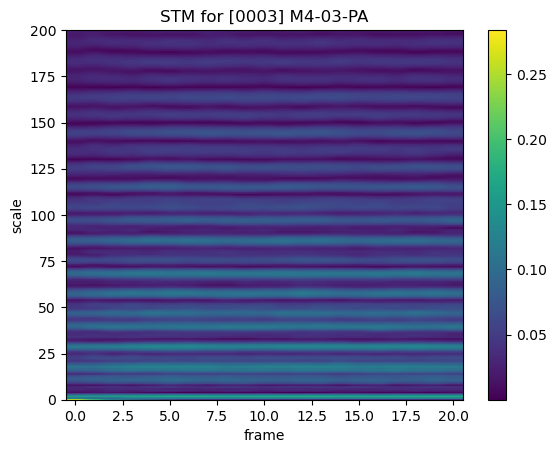

In [4]:
plt.imshow(STM[3], origin='lower', aspect='auto', cmap='viridis')
plt.xlabel('frame')
plt.ylabel('scale')
plt.ylim(0, 200)
plt.title('STM for [0003] M4-03-PA')
plt.colorbar();

Mean STM values of all tracks:

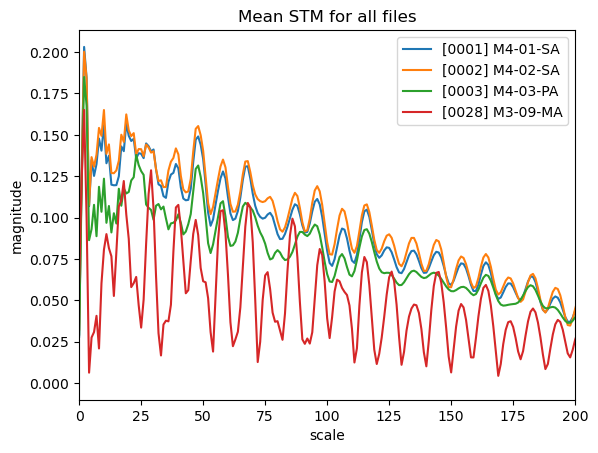

In [5]:
plt.plot(STM_mean.T)
plt.xlabel('scale')
plt.ylabel('magnitude')
plt.xlim(0, 200)
plt.title('Mean STM for all files')
plt.legend(filenames);

We observe that the mean STMs for `[0001] M4-01-SA` and `[0002] M4-02-SA` are very similar (both are examples from the _samba_ genre). `[0003] M4-03-PA` and `[0028] M3-09-MA` correspond to other music styles: _partido-alto_ (which can be regarded as a _samba_ subgenre) and _marcha_.

Let's prepare all frames for a low-dimensional visualization:

In [6]:
X = []
group = []
cdict = {0: 'C0', 1: 'C1', 2: 'C2', 3: 'C3'}
for i in range(len(STM)):
    # Grabbing just the first 200 scale coefficients
    STM_cut = STM[i][:200,:]
    X.append(STM_cut.T)
    
    # Labelling
    n_frames = np.ones(STM_cut.shape[1])
    group.append(i * n_frames)
X = np.vstack(X)
group = np.hstack(group).astype('int')

Transforming the data:

In [7]:
embedding = MDS(n_components=2, random_state=20)
Xt = embedding.fit_transform(X)

Plotting the embedding:

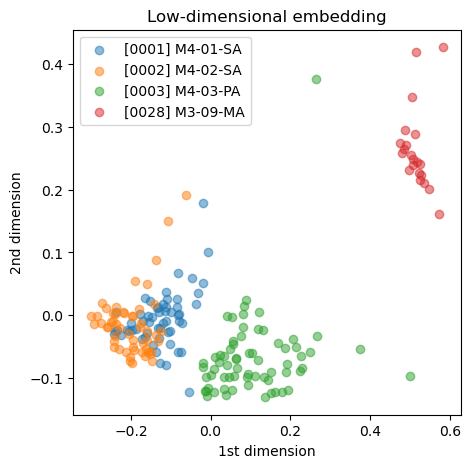

In [8]:
plt.figure(figsize=(5,5))
for g in np.unique(group):
    idx = np.where(group==g)
    plt.scatter(Xt[idx,0], Xt[idx,1], c=cdict[g], label=filenames[g], alpha=0.5)
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')
plt.title('Low-dimensional embedding')
plt.legend();